# Graph Implementation of Traffic Data

In [1]:
# change directory to parent folder to access all folders
import os
path = os.path.dirname(os.getcwd())
os.chdir(path)
from data_preprocessing.classes.load_traffic_data import Import_Traffic_Data

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import ast
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout
from stellargraph import StellarGraph, StellarDiGraph
import stellargraph as sg
from datetime import datetime
from stellargraph.layer import GCN_LSTM

# Load in Data

In [5]:
# Peartree roundabout bbox and datetimes of interest
top=51.798433
bottom=51.791451
right=-1.281979
left=-1.289524
datetime_start=datetime(2021,6,23,0,0)
datetime_end=datetime(2021,7,6,12,0)

# load in traffic data
traffic_data,time = Import_Traffic_Data(top,bottom,right,left).load_traffic_data(datetime_start,datetime_end)

The number of road segments within the area of interest is:  70
202106230000
202106230005
202106230010
202106230015
202106230020
202106230025
202106230030
202106230035
202106230040
202106230045
202106230050
202106230055
202106230100
202106230105
202106230110
202106230115
202106230120
202106230125
202106230130
202106230135
202106230140
202106230145
202106230150
202106230155
202106230200
202106230205
202106230210
202106230215
202106230220
202106230225
202106230230
202106230235
202106230240
202106230245
202106230250
202106230255
202106230300
202106230305
202106230310
202106230315
202106230320
202106230325
202106230330
202106230335
202106230340
202106230345
202106230350
202106230355
202106230400
202106230405
202106230410
202106230415
202106230420
202106230425
202106230430
202106230435
202106230440
202106230445
202106230450
202106230455
202106230500
202106230505
202106230510
202106230515
202106230520
202106230525
202106230530
202106230535
202106230540
202106230545
202106230550
202106230555


202106250450
202106250455
202106250500
202106250505
202106250510
202106250515
202106250520
202106250525
202106250530
202106250535
202106250540
202106250545
202106250550
202106250555
202106250600
202106250605
202106250610
202106250615
202106250620
202106250625
202106250630
202106250635
202106250640
202106250645
202106250650
202106250655
202106250700
202106250705
202106250710
202106250715
202106250720
202106250725
202106250730
202106250735
202106250740
202106250745
202106250750
202106250755
202106250800
202106250805
202106250810
202106250815
202106250820
202106250825
202106250830
202106250835
202106250840
202106250845
202106250850
202106250855
202106250900
202106250905
202106250910
202106250915
202106250920
202106250925
202106250930
202106250935
202106250940
202106250945
202106250950
202106250955
202106251000
202106251005
202106251010
202106251015
202106251020
202106251025
202106251030
202106251035
202106251040
202106251045
202106251050
202106251055
202106251100
202106251105
202106251110

202106271100
202106271105
202106271110
202106271115
202106271120
202106271125
202106271130
202106271135
202106271140
202106271145
202106271150
202106271155
202106271200
202106271205
202106271210
202106271215
202106271220
202106271225
202106271230
202106271235
202106271240
202106271245
202106271250
202106271255
202106271300
202106271305
202106271310
202106271315
202106271320
202106271325
202106271330
202106271335
202106271340
202106271345
202106271350
202106271355
202106271400
202106271405
202106271410
202106271415
202106271420
202106271425
202106271430
202106271435
202106271440
202106271445
202106271450
202106271455
202106271500
202106271505
202106271510
202106271515
202106271520
202106271525
202106271530
202106271535
202106271540
202106271545
202106271550
202106271555
202106271600
202106271605
202106271610
202106271615
202106271620
202106271625
202106271630
202106271635
202106271640
202106271645
202106271650
202106271655
202106271700
202106271705
202106271710
202106271715
202106271720

202106291715
202106291720
202106291725
202106291730
202106291735
202106291740
202106291745
202106291750
202106291755
202106291800
202106291805
202106291810
202106291815
202106291820
202106291825
202106291830
202106291835
202106291840
202106291845
202106291850
202106291855
202106291900
202106291905
202106291910
202106291915
202106291920
202106291925
202106291930
202106291935
202106291940
202106291945
202106291950
202106291955
202106292000
202106292005
202106292010
202106292015
202106292020
202106292025
202106292030
202106292035
202106292040
202106292045
202106292050
202106292055
202106292100
202106292105
202106292110
202106292115
202106292120
202106292125
202106292130
202106292135
202106292140
202106292145
202106292150
202106292155
202106292200
202106292205
202106292210
202106292215
202106292220
202106292225
202106292230
202106292235
202106292240
202106292245
202106292250
202106292255
202106292300
202106292305
202106292310
202106292315
202106292320
202106292325
202106292330
202106292335

202107012305
202107012310
202107012315
202107012320
202107012325
202107012330
202107012335
202107012340
202107012345
202107012350
202107012355
202107020000
202107020005
202107020010
202107020015
202107020020
202107020025
202107020030
202107020035
202107020040
202107020045
202107020050
202107020055
202107020100
202107020105
202107020110
202107020115
202107020120
202107020125
202107020130
202107020135
202107020140
202107020145
202107020150
202107020155
202107020200
202107020205
202107020210
202107020215
202107020220
202107020225
202107020230
202107020235
202107020240
202107020245
202107020250
202107020255
202107020300
202107020305
202107020310
202107020315
202107020320
202107020325
202107020330
202107020335
202107020340
202107020345
202107020350
202107020355
202107020400
202107020405
202107020410
202107020415
202107020420
202107020425
202107020430
202107020435
202107020440
202107020445
202107020450
202107020455
202107020500
202107020505
202107020510
202107020515
202107020520
202107020525

202107040445
202107040450
202107040455
202107040500
202107040505
202107040510
202107040515
202107040520
202107040525
202107040530
202107040535
202107040540
202107040545
202107040550
202107040555
202107040600
202107040605
202107040610
202107040615
202107040620
202107040625
202107040630
202107040635
202107040640
202107040645
202107040650
202107040655
202107040700
202107040705
202107040710
202107040715
202107040720
202107040725
202107040730
202107040735
202107040740
202107040745
202107040750
202107040755
202107040800
202107040805
202107040810
202107040815
202107040820
202107040825
202107040830
202107040835
202107040840
202107040845
202107040850
202107040855
202107040900
202107040905
202107040910
202107040915
202107040920
202107040925
202107040930
202107040935
202107040940
202107040945
202107040950
202107040955
202107041000
202107041005
202107041010
202107041015
202107041020
202107041025
202107041030
202107041035
202107041040
202107041045
202107041050
202107041055
202107041100
202107041105

202107060925
202107060930
202107060935
202107060940
202107060945
202107060950
202107060955
202107061000
202107061005
202107061010
202107061015
202107061020
202107061025
202107061030
202107061035
202107061040
202107061045
202107061050
202107061055
202107061100
202107061105
202107061110
202107061115
202107061120
202107061125
202107061130
202107061135
202107061140
202107061145
202107061150
202107061155
202107061200


In [6]:
# speed capped by speed limit
sp = traffic_data[:,:,5]

# speed uncapped by speed limit
su = traffic_data[:,:,6]

# free-flow speed 
ffs = traffic_data[:,:,7]

# HERE jam factor index
jf = traffic_data[:,:,8]

# coordinates
lons = traffic_data[0,:,4]
lats = traffic_data[0,:,3]

# Create Road-Network Graph

In [9]:
# load in csv of node connections
connections = pd.read_csv("data_preprocessing/peartree_roundabout.csv")
connections.head(5)

,Unnamed: 0,road_name,connections,direction,lat_start,lat_end,lon_start,lon_end,feeding_roads,type
0,1176,Wolvercote,Wolvercote1176,+,51.79751,51.79719,-1.28848,-1.28802,NaN,road
1,1177,Wolvercote,Wolvercote1177,+,51.79719,51.79704,-1.28802,-1.28746,1176,road
2,1178,Wolvercote,Wolvercote1178,+,51.79704,51.79704,-1.28746,-1.28735,"[1963,1177]",roundabout
3,1179,Wolvercote,Wolvercote1179,+,51.79704,51.79686,-1.28735,-1.28721,1178,roundabout
4,1180,Wolvercote,Wolvercote1180,+,51.79686,51.79681,-1.28721,-1.28726,1179,roundabout


In [10]:
# convert feeding roads to integers
for i in range(len(connections)):
#for i in range(4):
    try:
        connections.feeding_roads.iloc[i] = ast.literal_eval(connections.feeding_roads.iloc[i])
    except ValueError:
        connections.feeding_roads.iloc[i] = np.nan

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Collect nodes for Graph 

In [11]:
# node connections
#nodes = connections["Unnamed: 0"][:4]
#roads = connections.feeding_roads[:4]
nodes = connections["Unnamed: 0"]
roads = connections.feeding_roads
# replace nans with 0's
connections.feeding_roads = connections.feeding_roads.fillna(0)

In [12]:
# loop thru and establish edges
edge_list = []
for row in range(len(roads)):
    node1 = connections["Unnamed: 0"].iloc[row]
    node2 = connections.feeding_roads.iloc[row]
    try:
        for i in range(len(node2)):
            edge_list.append([node2[i], node1])
        #node2 = connections.feeding_roads.iloc[row]
    except TypeError:
        edge_list.append([node2, node1])
        
# remove 0's
edges = []
for edge in edge_list:
    if edge[0]==0:
        pass
    else:
        edges.append(edge)
        

In [13]:
#build the graph
G = nx.Graph()
for i in range(len(nodes)):
    G.add_node(nodes[i],spd=sp[:,i])
    #G.add_edge(nodes[i])
#G.add_nodes_from(nodes)
G.add_edges_from(edges)



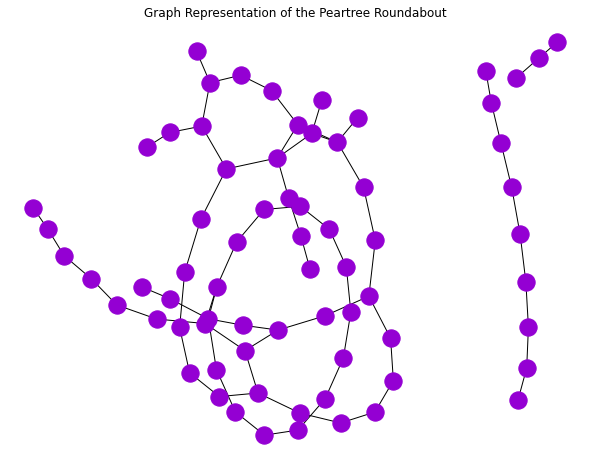

In [41]:
plt.figure(1,figsize=(8,6)) 
nx.draw(G,node_size=300,pos=nx.spring_layout(G),node_color="darkviolet")
plt.title("Graph Representation of the Peartree Roundabout")
plt.savefig("figures/Peartree_roundabout_graph")

The above graph representation is of the Peartree roundabout in the northwest of Oxford. There are two segments of road that do not connect to the remainder of the road network. One is the A34 and the other is a segment of road that 

In [120]:
# get adjacency matrix 
A = nx.to_numpy_array(G)


### Save Graph Edges

In [121]:
# write edges to file
#nx.write_edgelist(G, "graph.edgelist")


### Load Graph Edges

In [122]:
# read in graph edgelist again
#g = nx.read_edgelist("graph.edgelist")